In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
dfh = pd.read_csv('Housing.csv')
dfa = pd.read_csv('advertising.csv')

<h2>Housing</h2>

In [12]:
(dfh.sample())

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
55,7350000,6000,3,1,2,yes,no,no,no,yes,1,no,unfurnished


In [13]:
print(dfh.shape)
print(dfh.dtypes)

(545, 13)
price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [40]:
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
dfh[binary_cols] = dfh[binary_cols].apply(lambda x: x.map({'yes': 1, 'no': 0}))

dfh = pd.get_dummies(dfh, columns=['furnishingstatus'], drop_first=True)
dfh.sample(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
523,2380000,2787,4,2,2,1,0,0,0,0,0,0,False,False
398,3500000,3120,3,1,2,1,0,0,0,0,1,0,False,True
114,6020000,6800,2,1,1,1,1,1,0,0,2,0,False,False
364,3703000,3120,3,1,2,0,0,1,1,0,0,0,True,False
302,4200000,2145,3,1,3,1,0,0,0,0,1,1,False,True


In [41]:
num_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

#min-max scaling
dfh[num_cols] = (dfh[num_cols] - dfh[num_cols].min()) / (dfh[num_cols].max() - dfh[num_cols].min())
dfh.sample(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
155,0.327273,0.305842,0.4,0.333333,0.000000,1,0,1,0,0,0.666667,1,False,False
223,0.260606,0.321031,0.4,0.000000,0.333333,1,0,1,0,1,0.333333,0,False,False
344,0.181818,0.151203,0.2,0.000000,0.000000,1,0,0,0,0,0.000000,0,True,False
509,0.072727,0.134021,0.2,0.333333,0.333333,1,0,1,0,0,0.333333,0,False,False
398,0.151515,0.101031,0.4,0.000000,0.333333,1,0,0,0,0,0.333333,0,False,True


In [16]:

print(dfh.describe())


            price        area    bedrooms   bathrooms     stories    mainroad  \
count  545.000000  545.000000  545.000000  545.000000  545.000000  545.000000   
mean     0.261189    0.240587    0.393028    0.095413    0.268502    0.858716   
std      0.161943    0.149151    0.147613    0.167490    0.289164    0.348635   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.145455    0.134021    0.200000    0.000000    0.000000    1.000000   
50%      0.224242    0.202749    0.400000    0.000000    0.333333    1.000000   
75%      0.345455    0.323711    0.400000    0.333333    0.333333    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        guestroom    basement  hotwaterheating  airconditioning     parking  \
count  545.000000  545.000000       545.000000       545.000000  545.000000   
mean     0.177982    0.350459         0.045872         0.315596    0.231193   
std      0.382849    0.477552    

In [42]:

numeric_cols = dfh.select_dtypes(include=['int64', 'float64']).columns

outlier_counts = {}

for col in numeric_cols:
    Q1 = dfh[col].quantile(0.25)
    Q3 = dfh[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = dfh[(dfh[col] < lower_bound) | (dfh[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

for col, count in outlier_counts.items():
    print(f"{col}: {count} outliers")
print(dfh.shape)

price: 15 outliers
area: 12 outliers
bedrooms: 12 outliers
bathrooms: 1 outliers
stories: 41 outliers
mainroad: 77 outliers
guestroom: 97 outliers
basement: 0 outliers
hotwaterheating: 25 outliers
airconditioning: 0 outliers
parking: 12 outliers
prefarea: 128 outliers
(545, 14)


IndexError: index 12 is out of bounds for axis 0 with size 12

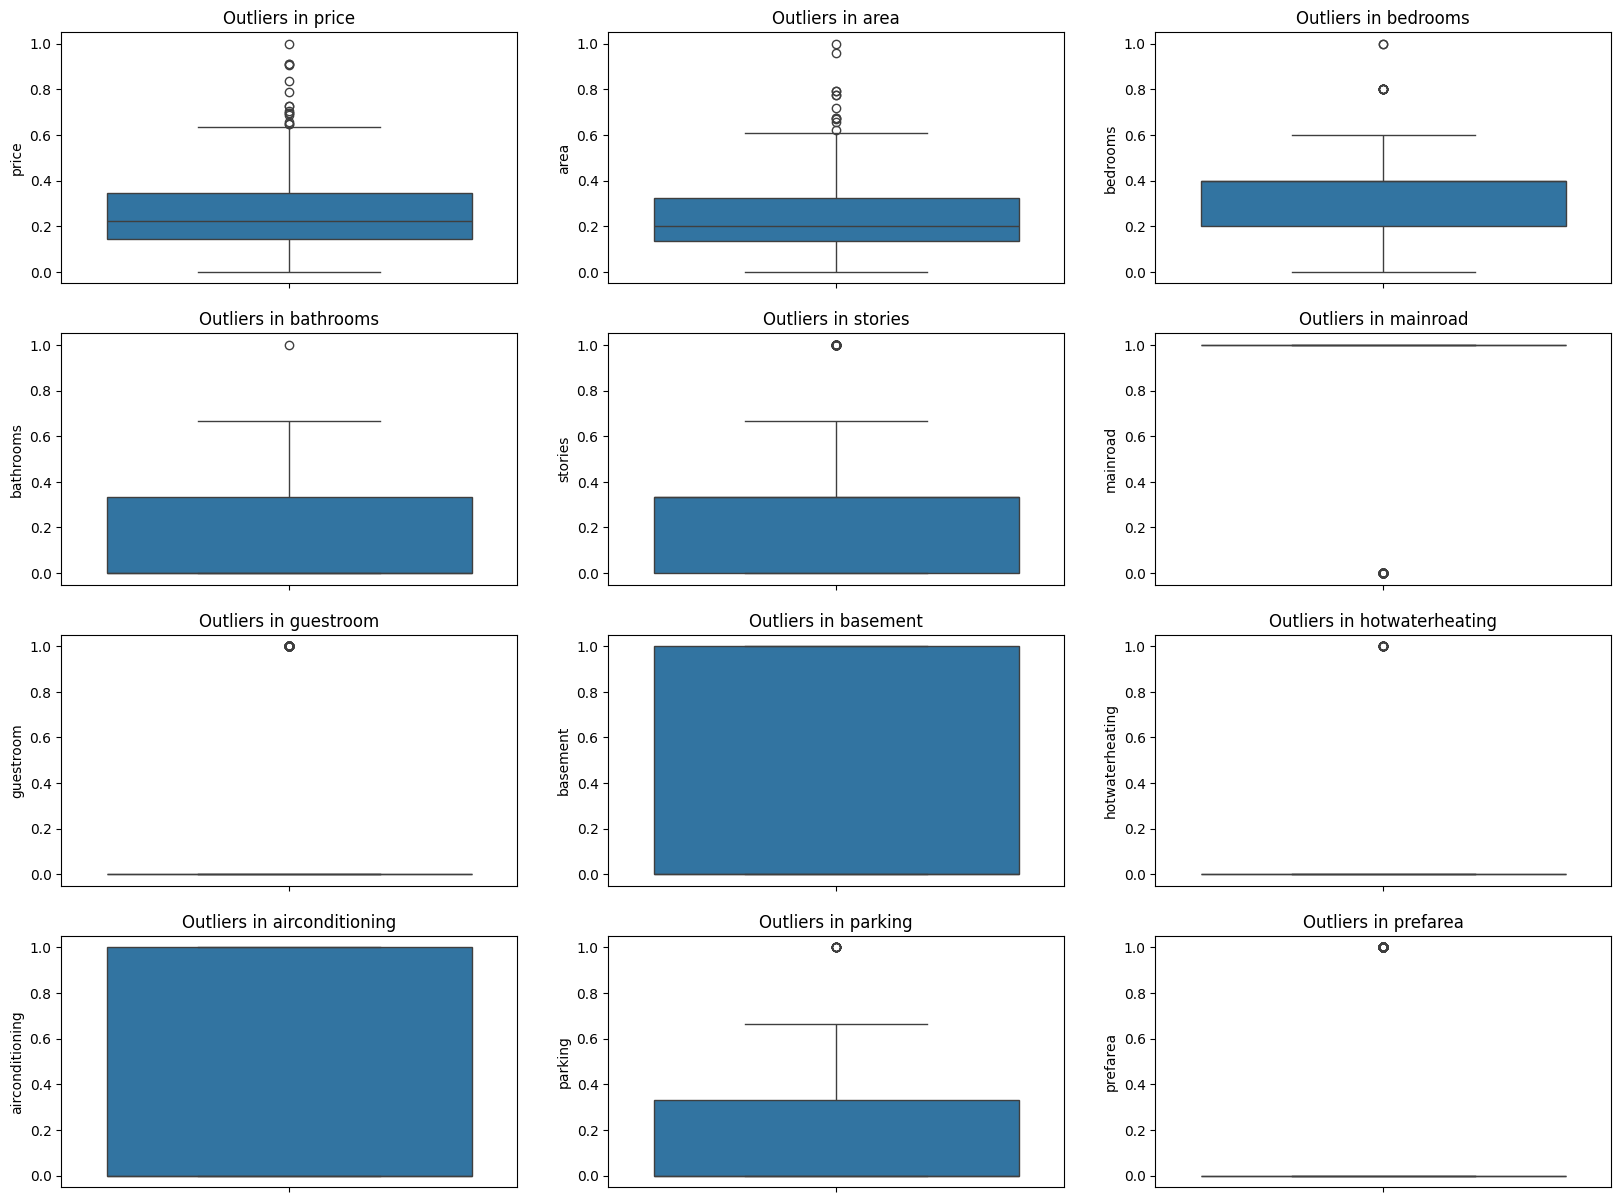

In [43]:

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))  # adjust 4,3 to your need
axes = axes.flatten()  # Flatten to 1D for easy iteration

for i, col in enumerate(dfh.columns):
    sns.boxplot(y=dfh[col], ax=axes[i])
    axes[i].set_title(f'Outliers in {col}')

plt.tight_layout()
plt.show()

<Axes: >

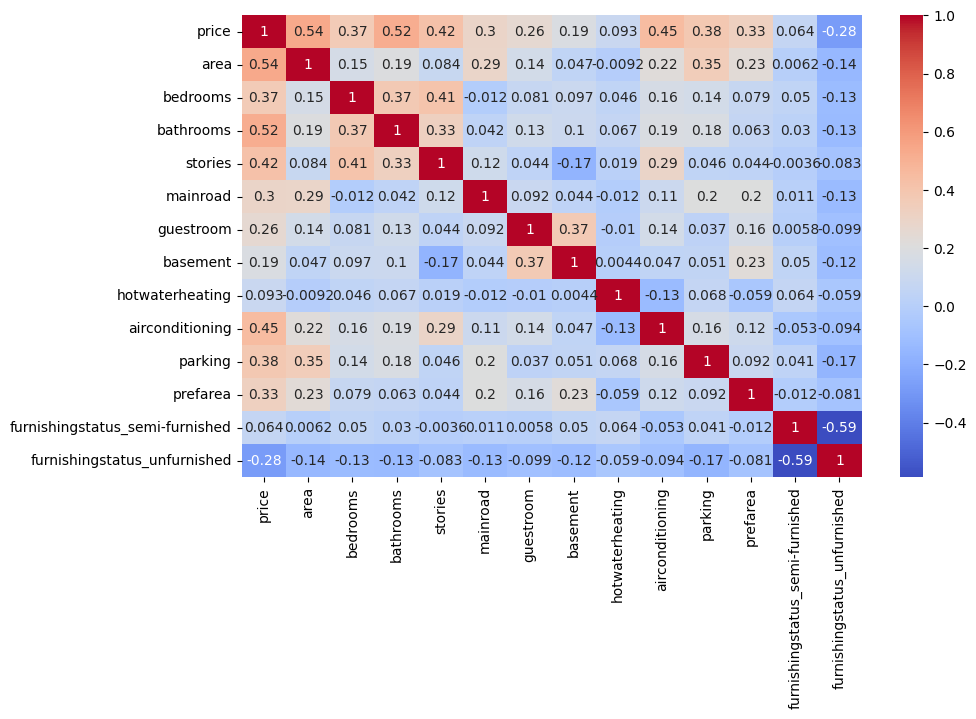

In [19]:
corr = dfh.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")


In [44]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


dfh_clean = dfh.copy()

def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

important_cols = ["price", "area", "bathrooms"]

for col in ['area','bathrooms']:
    dfh_clean = remove_outliers_iqr(dfh_clean, col)
    

print(f"Data shape before removing outliers: {dfh.shape}")
print(f"Data shape after removing outliers: {dfh_clean.shape}")


Data shape before removing outliers: (545, 14)
Data shape after removing outliers: (532, 14)


In [45]:
dfh_clean.sample()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
35,0.548133,0.367698,0.4,0.333333,1.0,1,0,0,0,1,0.666667,0,False,False


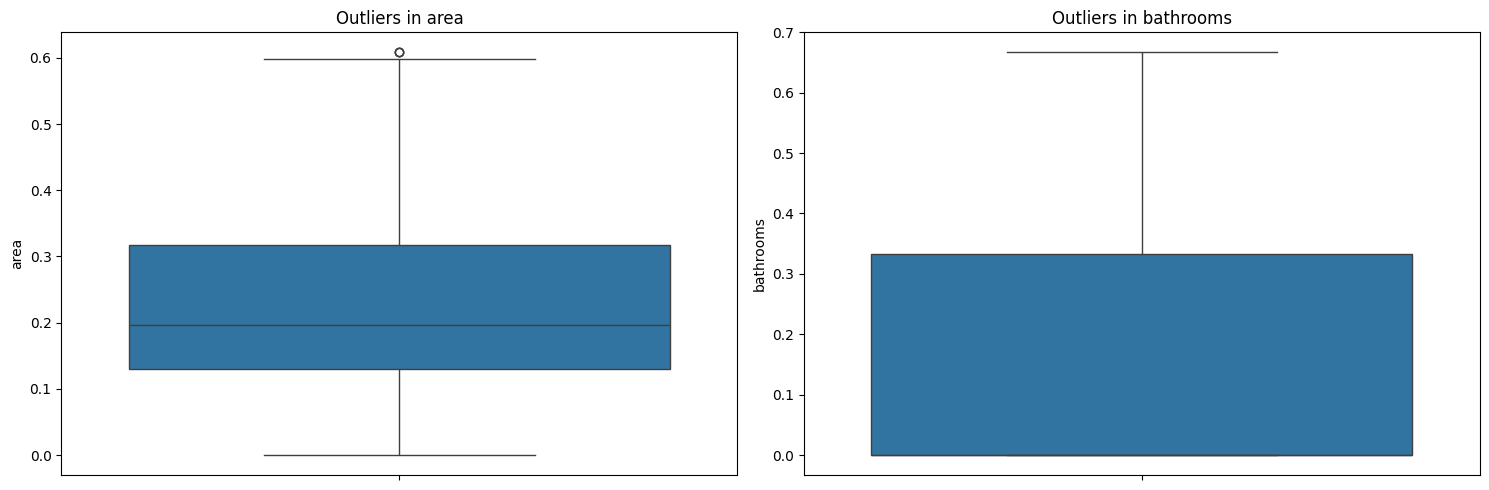

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes = axes.flatten()

for i, col in enumerate(['area','bathrooms']):
    sns.boxplot(y=dfh_clean[col], ax=axes[i])
    axes[i].set_title(f'Outliers in {col}')

plt.tight_layout()
plt.show()

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X =  dfh_clean[["area","bathrooms",]]
y = dfh_clean["price"]


model = LinearRegression()
model.fit(X, y)


y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])
print("Mean Squared Error:", mse)
print("R² Score:", r2)


Intercept: 0.08922703748810029
Slope: 0.5694377125728504
Mean Squared Error: 0.013579118647331734
R² Score: 0.454460812936636


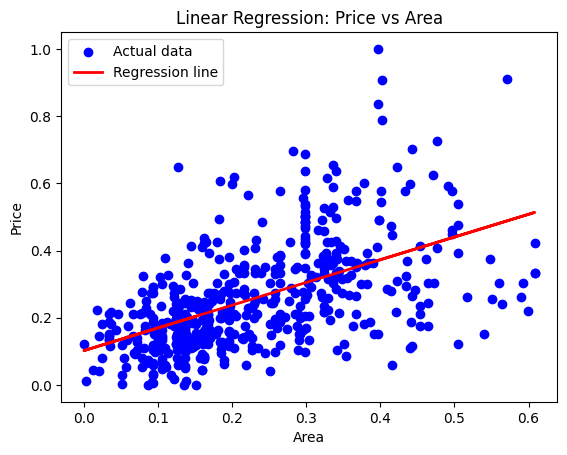

Intercept: 0.10202029213956809
Slope: 0.6764568710499188
Mean Squared Error: 0.017515760564110028
R² Score: 0.2963067760794066


In [48]:

X = dfh_clean[['area']]
y = dfh_clean['price']

model = LinearRegression()
model.fit(X, y)


y_pred = model.predict(X)


plt.scatter(X, y, color='blue', label='Actual data')


plt.plot(X, y_pred, color='red', linewidth=2, label='Regression line')

plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Linear Regression: Price vs Area')
plt.legend()
plt.show()


mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])
print("Mean Squared Error:", mse)
print("R² Score:", r2)

<h2>Advertising</h2>

In [7]:
print(dfa.describe())
print('\nNull count:\n',dfa.isnull().sum())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000

Null count:
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [9]:
dfa_scaled = dfa.copy()

#standard scaling
for col in ['TV', 'Radio', 'Newspaper']:
    mean = dfa[col].mean()
    std = dfa[col].std()
    dfa_scaled[col] = (dfa[col] - mean) / std
dfa_scaled.describe()

,TV,Radio,Newspaper,Sales
count,2.000000e+02,2.000000e+02,2.000000e+02,200.000000
mean,1.221245e-16,-4.263256e-16,2.486900e-16,15.130500
std,1.000000e+00,1.000000e+00,1.000000e+00,5.283892
min,-1.704546e+00,-1.566936e+00,-1.389161e+00,1.600000
25%,-8.464055e-01,-8.950745e-01,-8.174990e-01,11.000000
50%,3.153601e-02,-2.451705e-02,-2.205833e-01,16.000000
75%,8.360974e-01,8.931886e-01,6.679027e-01,19.050000
max,1.739664e+00,1.773849e+00,3.831556e+00,27.000000


In [10]:
num_cols2 = ['TV', 'Radio', 'Newspaper','Sales']

#min-max scaling

dfa[num_cols2] = (dfa[num_cols2] - dfa[num_cols2].min()) / (dfa[num_cols2].max() - dfa[num_cols2].min())
dfa.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,0.494902,0.469032,0.266086,0.532697
std,0.290342,0.299331,0.191545,0.208027
min,0.000000,0.000000,0.000000,0.000000
25%,0.249155,0.201109,0.109499,0.370079
50%,0.504058,0.461694,0.223835,0.566929
75%,0.737656,0.736391,0.394019,0.687008
max,1.000000,1.000000,1.000000,1.000000


In [40]:
outlier_counts = {}

for col in dfa.columns:
    Q1 = dfa[col].quantile(0.25)
    Q3 = dfa[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = dfa[(dfa[col] < lower_bound) | (dfa[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

for col, count in outlier_counts.items():
    print(f"{col}: {count} outliers")


TV: 0 outliers
Radio: 0 outliers
Newspaper: 2 outliers
Sales: 0 outliers


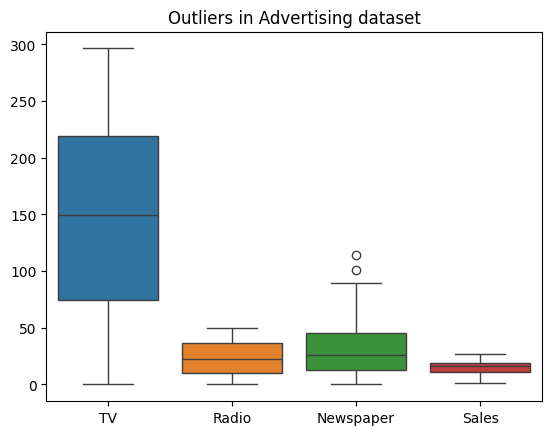

In [42]:
sns.boxplot(dfa)
plt.title('Outliers in Advertising dataset')
plt.show()


In [19]:
X = dfa_scaled[['TV', 'Radio', 'Newspaper']]
y = dfa_scaled['Sales']

In [51]:

Q1 = dfa["Newspaper"].quantile(0.25)
Q3 = dfa["Newspaper"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

dfa = dfa[(dfa["Newspaper"] >= lower_bound) & (dfa["Newspaper"] <= upper_bound)]


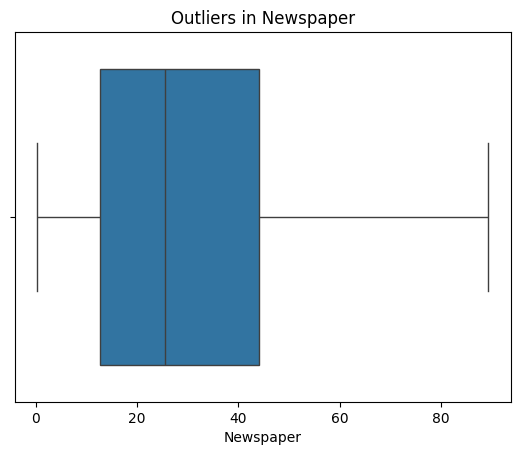

In [52]:
sns.boxplot(x=dfa['Newspaper'])
plt.title('Outliers in Newspaper')
plt.show()


<Axes: >

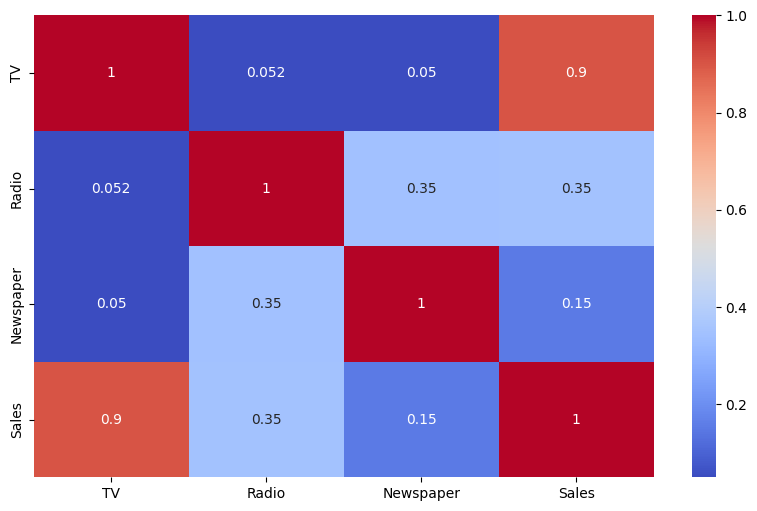

In [53]:

corr = dfa.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")


Intercept: 6.955648955889783
Slope: 0.055521445059231005
R² Score: 0.8099540690272746


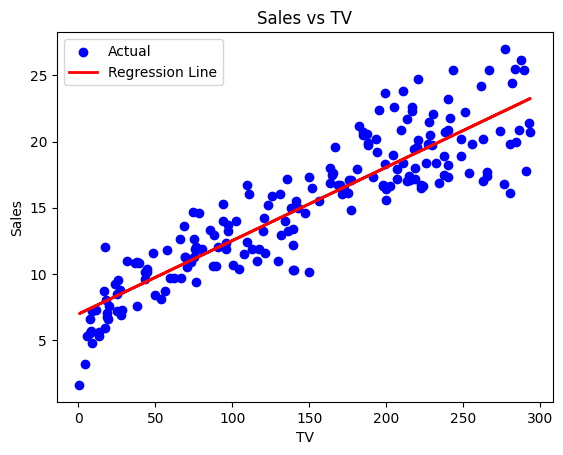

In [54]:
# Features and target
X = dfa[["TV"]]  # must be 2D for sklearn
y = dfa["Sales"]

# Model
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Coefficients
print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])
print("R² Score:", model.score(X, y))

# Plot
plt.scatter(X, y, color="blue", label="Actual")
plt.plot(X, y_pred, color="red", linewidth=2, label="Regression Line")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("Sales vs TV")
plt.legend()
plt.show()
